In [1]:
import os
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib notebook

# 载入初始CSV数据

In [2]:
path = os.getcwd()+'/../data/20122018freshwater.csv'
df = pd.read_csv(path, na_values = np.nan)
print(df.shape)

(33614, 8)


In [4]:
df.head()

,水系,点位名称,河流名称,pH,DO(mg/l),CODMn(mg/l),NH3-N(mg/l),本周水质
0,巢湖流域,安徽巢湖裕溪口,巢湖,7.09,10.0,5.7,0.33,3
1,巢湖流域,合肥湖滨,巢湖,6.94,12.0,5.4,0.40,3
2,巢湖流域,安徽巢湖裕溪口,巢湖,7.20,9.6,4.9,0.34,3
3,巢湖流域,合肥湖滨,巢湖,6.80,11.6,6.3,0.59,4
4,巢湖流域,合肥湖滨,巢湖,6.75,11.0,6.2,0.64,4


In [5]:
# df['水系'].value_counts().plot(kind="bar")
# plt.show()

# 调取matplotlib做数据可视化

<IPython.core.display.Javascript object>


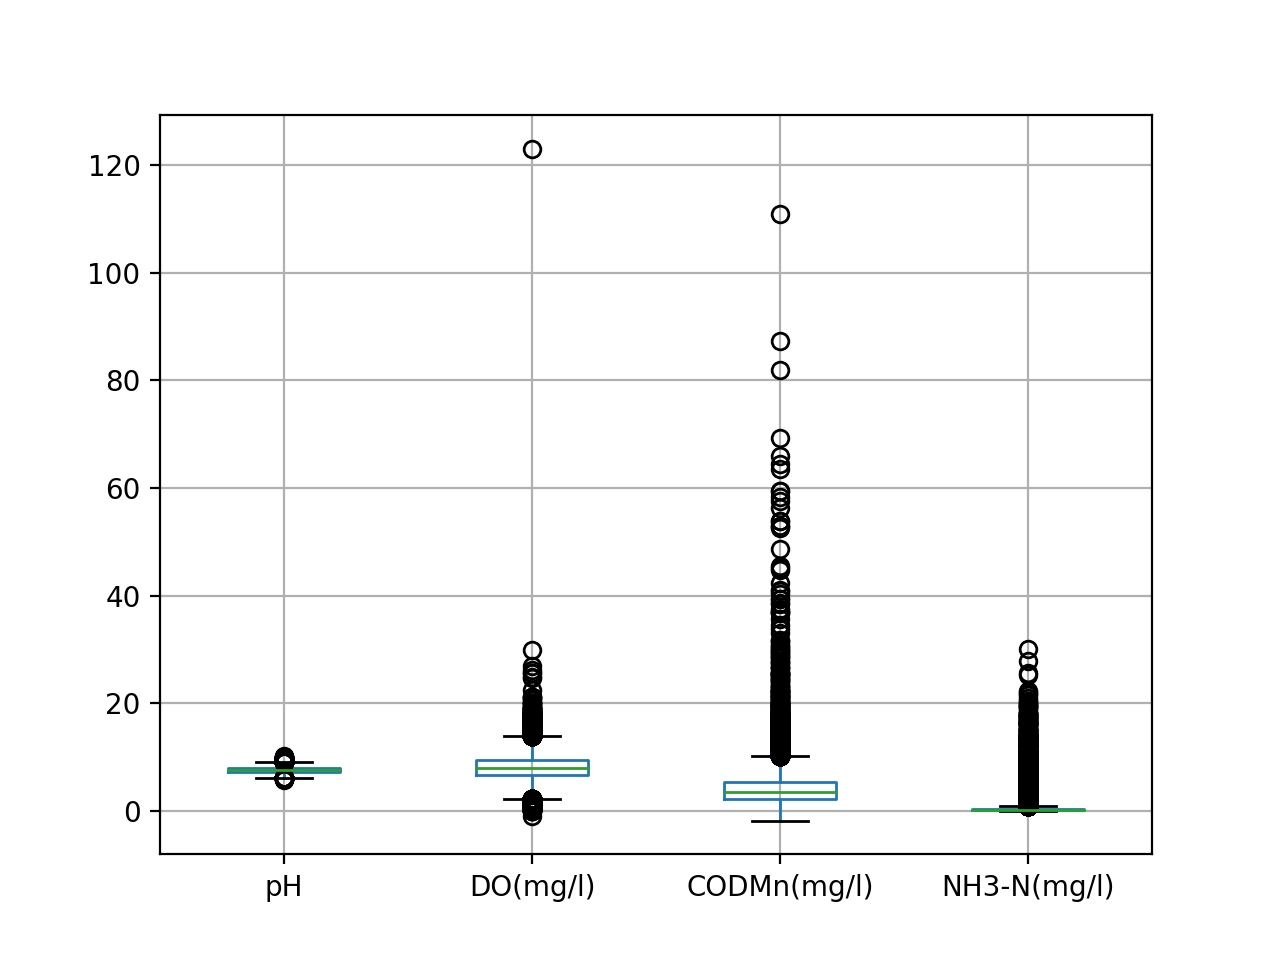

In [6]:
df.boxplot()
plt.show()

<IPython.core.display.Javascript object>


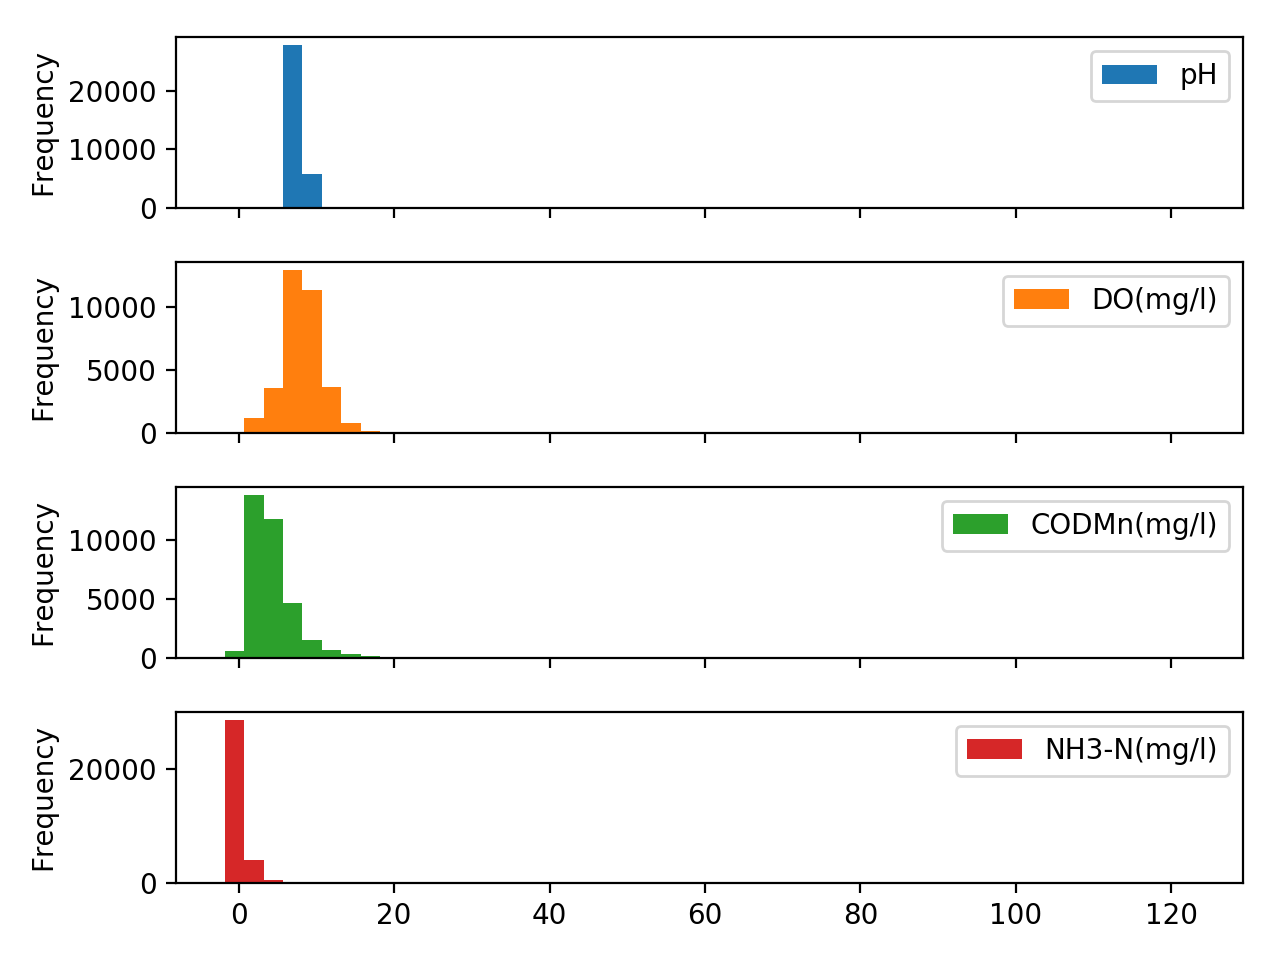

In [7]:
df.plot.hist(subplots=True, bins=50)  #将各列在一figure中分成子图，
plt.legend() 
plt.tight_layout()
plt.show()

In [8]:
df[df["DO(mg/l)"] > 40]

,水系,点位名称,河流名称,pH,DO(mg/l),CODMn(mg/l),NH3-N(mg/l),本周水质
2627,松花江流域,抚远,黑龙江,7.14,123.0,7.2,0.28,4


In [9]:
df[df["CODMn(mg/l)"] > 70]

,水系,点位名称,河流名称,pH,DO(mg/l),CODMn(mg/l),NH3-N(mg/l),本周水质
27792,淮河流域,安徽宿州杨庄,奎河,8.10,8.90,110.8,0.82,6
28888,黄河流域,山西运城河津大桥,汾河,7.19,1.09,87.3,0.97,6
28913,黄河流域,山西运城河津大桥,汾河,7.14,1.40,82.0,1.76,6


In [10]:
drop_columns = ['水系', '点位名称', '河流名称']

df = df.dropna(axis=0)
df.drop(drop_columns, 1, inplace=True)

In [12]:
df[df.isnull().values==True]

,pH,DO(mg/l),CODMn(mg/l),NH3-N(mg/l),本周水质


In [13]:
df["pH"] = (df["pH"] - df["pH"].mean())/df["pH"].std(ddof=0)
df["DO(mg/l)"] = (df["DO(mg/l)"] - df["DO(mg/l)"].mean())/df["DO(mg/l)"].std(ddof=0)
df["CODMn(mg/l)"] = (df["CODMn(mg/l)"] - df["CODMn(mg/l)"].mean())/df["CODMn(mg/l)"].std(ddof=0)
df["NH3-N(mg/l)"] = (df["NH3-N(mg/l)"] - df["NH3-N(mg/l)"].mean())/df["NH3-N(mg/l)"].std(ddof=0)

<IPython.core.display.Javascript object>


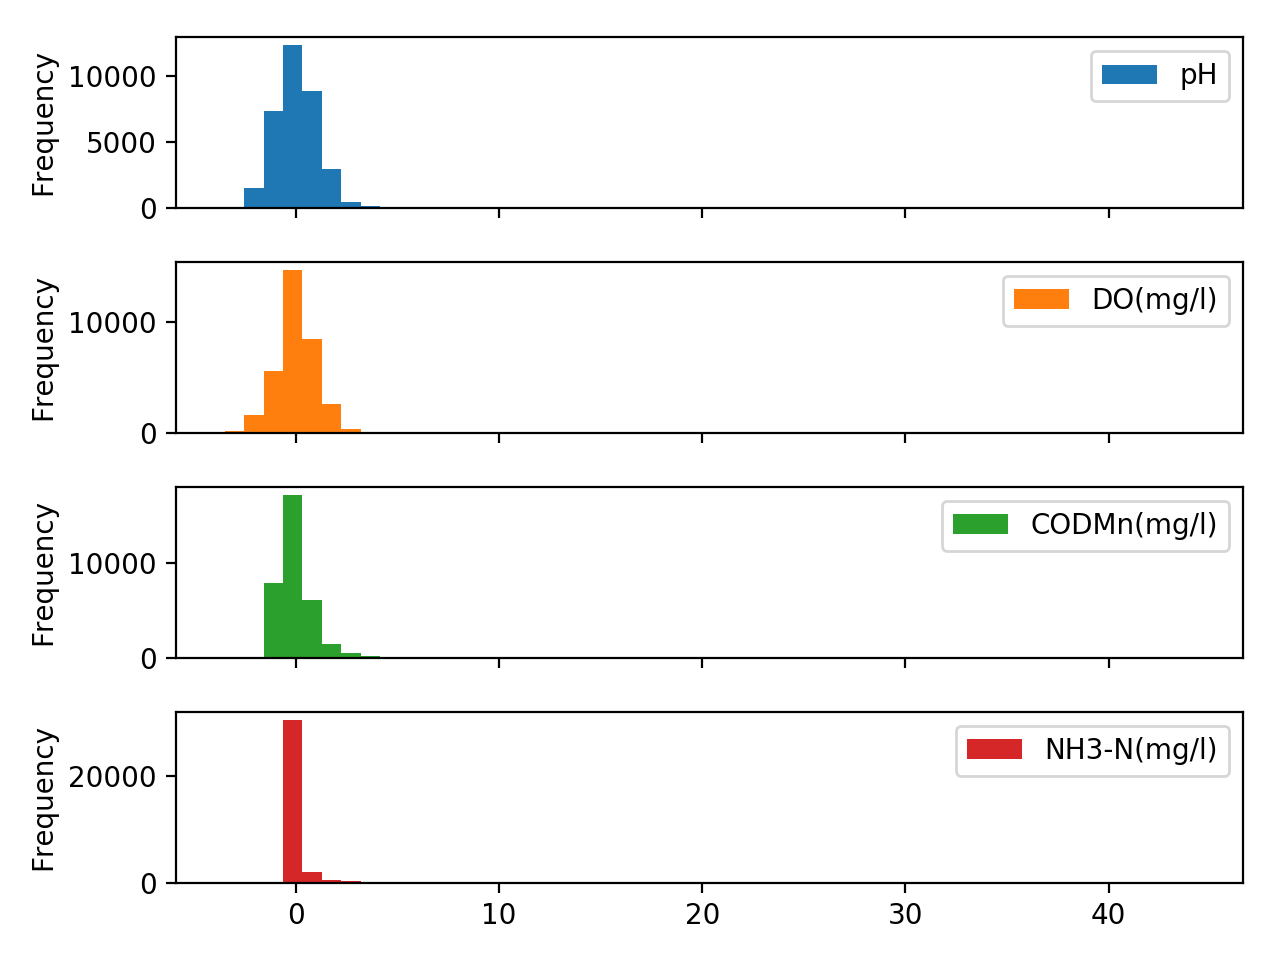

In [14]:
df.plot.hist(subplots=True, bins=50)  #将各列在一figure中分成子图，
plt.legend() 
plt.tight_layout()
plt.show()

In [15]:
# output_path = os.getcwd()+'/../data/water/csv/20122018freshwater_four_feature.csv'
# data.to_csv(output_path, encoding='utf-8', index=False)